In [23]:
# Auto-Reload for Fast Iteration
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from pathlib import Path
import sys

project_root = Path("/Users/liuq13/vae-fmri-tms")               
sys.path.append(str(project_root))

In [25]:
# Import from config.py (which is in the root folder)
from utils.config import *

# Import custom functions from your utils package
from utils.models import VAE, CVAE

from utils.train_utils import (
    train_vae,
    loss_function,
    get_latent_mu,
    get_latent_mu_cvae,
    compute_condition_distances,
    compute_per_session_dist_to_null
)

from utils.data_utils import (
    load_all_fc_data,
    preprocess_for_torch
)

from utils.utils_plotting import (
    plot_vae_losses,
    plot_latent_embedding_by_condition_and_subject,
    plot_subject_distance_comparison
)


In [26]:
data_dir     = project_root / "data"
sub_cond_path     = data_dir / "subject_info.xlsx"
base_nifti_folder = data_dir / "data_FC"
condition_map = {'N': 0, 'S': 1, 'C': 2}

In [27]:
# Load and preprocess
use_roi = 0
all_corr_data, all_tms_type, all_subject_id, all_stimloc, all_session = load_all_fc_data(sub_cond_path, 
                                                               base_nifti_folder, 
                                                               mat_filename='conn_matrix_w_sphere.mat',
                                                               key_name='correlation_matrix',row_idx=use_roi)
# One-hot encode subject ID as condition
subject_arr = np.array(all_subject_id).reshape(-1, 1)
subject_encoder = OneHotEncoder(sparse_output=False, drop=None)
subject_ohe = subject_encoder.fit_transform(subject_arr)  # shape: [n_samples, n_subjects]

# Convert to torch tensors
X_tensor = preprocess_for_torch(all_corr_data)  
subject_cond_tensor = torch.tensor(subject_ohe, dtype=torch.float32)
dataset = TensorDataset(X_tensor, subject_cond_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_30/S3D2/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_44/S1D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_83/S3D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_87/D0/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_88/D0/conn_matrix_w_sphere.mat
Columns with NaN: 14 / 116
Tensor shape after preprocessing: torch.Size([331, 102])


In [28]:
X_tensor.shape

torch.Size([331, 102])

In [29]:
subject_cond_tensor.shape

torch.Size([331, 48])


===== Epoch 1 =====


Epoch 1/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 308.98it/s]


Epoch 1, Loss: 103.0292, Recon: 102.9797, KL: 0.0494

===== Epoch 2 =====


Epoch 2/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 714.71it/s]


Epoch 2, Loss: 102.7089, Recon: 102.6693, KL: 0.0396

===== Epoch 3 =====


Epoch 3/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 559.99it/s]


Epoch 3, Loss: 102.4592, Recon: 102.4038, KL: 0.0554

===== Epoch 4 =====


Epoch 4/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 706.80it/s]


Epoch 4, Loss: 102.3158, Recon: 102.2322, KL: 0.0836

===== Epoch 5 =====


Epoch 5/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 889.82it/s]


Epoch 5, Loss: 102.0326, Recon: 101.8969, KL: 0.1357

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1108.19it/s]


Epoch 6, Loss: 101.6521, Recon: 101.4291, KL: 0.2231

===== Epoch 7 =====


Epoch 7/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 985.02it/s]


Epoch 7, Loss: 101.1294, Recon: 100.7653, KL: 0.3640

===== Epoch 8 =====


Epoch 8/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 994.60it/s]


Epoch 8, Loss: 100.1270, Recon: 99.4792, KL: 0.6479

===== Epoch 9 =====


Epoch 9/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 711.74it/s]


Epoch 9, Loss: 98.6139, Recon: 97.4410, KL: 1.1729

===== Epoch 10 =====


Epoch 10/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 911.50it/s]


Epoch 10, Loss: 96.7619, Recon: 94.7116, KL: 2.0503

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1113.03it/s]


Epoch 11, Loss: 93.8912, Recon: 90.6002, KL: 3.2911

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1116.07it/s]


Epoch 12, Loss: 90.7800, Recon: 86.1132, KL: 4.6668

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1029.97it/s]


Epoch 13, Loss: 87.6952, Recon: 82.2110, KL: 5.4843

===== Epoch 14 =====


Epoch 14/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 977.18it/s]


Epoch 14, Loss: 85.3335, Recon: 79.7650, KL: 5.5685

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1103.08it/s]


Epoch 15, Loss: 83.3341, Recon: 77.9490, KL: 5.3851

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1081.49it/s]


Epoch 16, Loss: 81.8973, Recon: 76.7067, KL: 5.1907

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1109.20it/s]


Epoch 17, Loss: 80.4833, Recon: 74.8417, KL: 5.6417

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1023.16it/s]


Epoch 18, Loss: 78.5778, Recon: 72.8597, KL: 5.7181

===== Epoch 19 =====


Epoch 19/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1075.79it/s]


Epoch 19, Loss: 77.2149, Recon: 71.4525, KL: 5.7624

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1001.64it/s]


Epoch 20, Loss: 75.4434, Recon: 69.1276, KL: 6.3158

===== Epoch 21 =====


Epoch 21/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1057.69it/s]


Epoch 21, Loss: 73.8113, Recon: 67.0430, KL: 6.7682

===== Epoch 22 =====


Epoch 22/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 651.47it/s]


Epoch 22, Loss: 72.1915, Recon: 65.2828, KL: 6.9087

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1021.17it/s]


Epoch 23, Loss: 70.7086, Recon: 63.8391, KL: 6.8695

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1126.81it/s]


Epoch 24, Loss: 69.5139, Recon: 62.5907, KL: 6.9231

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1104.74it/s]


Epoch 25, Loss: 68.4268, Recon: 61.4790, KL: 6.9478

===== Epoch 26 =====


Epoch 26/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 974.55it/s]


Epoch 26, Loss: 67.9590, Recon: 61.2028, KL: 6.7562

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1073.29it/s]


Epoch 27, Loss: 67.0954, Recon: 60.5007, KL: 6.5946

===== Epoch 28 =====


Epoch 28/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1137.31it/s]


Epoch 28, Loss: 66.2944, Recon: 59.8364, KL: 6.4580

===== Epoch 29 =====


Epoch 29/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1234.41it/s]


Epoch 29, Loss: 65.8734, Recon: 59.6206, KL: 6.2528

===== Epoch 30 =====


Epoch 30/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.46it/s]


Epoch 30, Loss: 65.0825, Recon: 59.0529, KL: 6.0296

===== Epoch 31 =====


Epoch 31/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1230.43it/s]


Epoch 31, Loss: 64.8995, Recon: 59.1044, KL: 5.7951

===== Epoch 32 =====


Epoch 32/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1243.63it/s]


Epoch 32, Loss: 64.5464, Recon: 58.7862, KL: 5.7602

===== Epoch 33 =====


Epoch 33/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1201.12it/s]


Epoch 33, Loss: 63.9621, Recon: 58.2278, KL: 5.7343

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1195.76it/s]


Epoch 34, Loss: 63.7378, Recon: 58.2294, KL: 5.5083

===== Epoch 35 =====


Epoch 35/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1216.96it/s]


Epoch 35, Loss: 63.3921, Recon: 57.9583, KL: 5.4338

===== Epoch 36 =====


Epoch 36/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1231.51it/s]


Epoch 36, Loss: 63.2621, Recon: 57.8446, KL: 5.4175

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1253.15it/s]


Epoch 37, Loss: 62.8429, Recon: 57.6234, KL: 5.2195

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1229.18it/s]


Epoch 38, Loss: 62.6881, Recon: 57.5112, KL: 5.1769

===== Epoch 39 =====


Epoch 39/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1220.18it/s]


Epoch 39, Loss: 62.5148, Recon: 57.3020, KL: 5.2128

===== Epoch 40 =====


Epoch 40/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1244.16it/s]


Epoch 40, Loss: 62.1212, Recon: 57.0323, KL: 5.0889

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 41, Loss: 61.9903, Recon: 57.0247, KL: 4.9655

===== Epoch 42 =====


Epoch 42/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1205.23it/s]


Epoch 42, Loss: 61.8290, Recon: 56.9545, KL: 4.8746

===== Epoch 43 =====


Epoch 43/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1204.82it/s]


Epoch 43, Loss: 61.8480, Recon: 56.8815, KL: 4.9665

===== Epoch 44 =====


Epoch 44/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1214.27it/s]


Epoch 44, Loss: 61.4958, Recon: 56.5714, KL: 4.9244

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1249.83it/s]


Epoch 45, Loss: 61.2675, Recon: 56.4510, KL: 4.8165

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1227.12it/s]


Epoch 46, Loss: 61.0907, Recon: 56.3211, KL: 4.7697

===== Epoch 47 =====


Epoch 47/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1226.76it/s]


Epoch 47, Loss: 60.8687, Recon: 56.1759, KL: 4.6928

===== Epoch 48 =====


Epoch 48/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1259.04it/s]


Epoch 48, Loss: 60.5245, Recon: 55.8804, KL: 4.6441

===== Epoch 49 =====


Epoch 49/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1295.48it/s]


Epoch 49, Loss: 60.5390, Recon: 55.9777, KL: 4.5613

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1281.77it/s]


Epoch 50, Loss: 60.4698, Recon: 55.9075, KL: 4.5623

===== Epoch 51 =====


Epoch 51/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1196.04it/s]


Epoch 51, Loss: 60.1740, Recon: 55.6385, KL: 4.5355

===== Epoch 52 =====


Epoch 52/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1229.48it/s]


Epoch 52, Loss: 60.0854, Recon: 55.5559, KL: 4.5295

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1281.77it/s]


Epoch 53, Loss: 59.9283, Recon: 55.3612, KL: 4.5671

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1253.83it/s]


Epoch 54, Loss: 59.7497, Recon: 55.2375, KL: 4.5122

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1248.58it/s]


Epoch 55, Loss: 59.5296, Recon: 55.0674, KL: 4.4622

===== Epoch 56 =====


Epoch 56/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1270.06it/s]


Epoch 56, Loss: 59.4339, Recon: 55.0050, KL: 4.4289

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1250.84it/s]


Epoch 57, Loss: 59.0091, Recon: 54.5578, KL: 4.4513

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1269.18it/s]


Epoch 58, Loss: 59.0588, Recon: 54.7171, KL: 4.3418

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1232.37it/s]


Epoch 59, Loss: 58.7344, Recon: 54.3922, KL: 4.3422

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1266.67it/s]


Epoch 60, Loss: 58.7627, Recon: 54.4865, KL: 4.2762

===== Epoch 61 =====


Epoch 61/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1278.61it/s]


Epoch 61, Loss: 58.5545, Recon: 54.2388, KL: 4.3157

===== Epoch 62 =====


Epoch 62/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1269.29it/s]


Epoch 62, Loss: 58.3175, Recon: 54.0361, KL: 4.2814

===== Epoch 63 =====


Epoch 63/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1273.00it/s]


Epoch 63, Loss: 58.1994, Recon: 53.9775, KL: 4.2219

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1272.72it/s]


Epoch 64, Loss: 58.1347, Recon: 53.8634, KL: 4.2713

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1292.76it/s]


Epoch 65, Loss: 57.7501, Recon: 53.4440, KL: 4.3061

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1320.36it/s]


Epoch 66, Loss: 57.7492, Recon: 53.4826, KL: 4.2665

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1281.63it/s]


Epoch 67, Loss: 57.3710, Recon: 53.1026, KL: 4.2684

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1284.02it/s]


Epoch 68, Loss: 57.2546, Recon: 53.0536, KL: 4.2010

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1277.87it/s]


Epoch 69, Loss: 56.9996, Recon: 52.8542, KL: 4.1454

===== Epoch 70 =====


Epoch 70/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1302.10it/s]


Epoch 70, Loss: 56.8861, Recon: 52.7118, KL: 4.1743

===== Epoch 71 =====


Epoch 71/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1298.55it/s]


Epoch 71, Loss: 56.6590, Recon: 52.5015, KL: 4.1575

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1316.93it/s]


Epoch 72, Loss: 56.5337, Recon: 52.3771, KL: 4.1565

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1290.77it/s]


Epoch 73, Loss: 56.3250, Recon: 52.1816, KL: 4.1433

===== Epoch 74 =====


Epoch 74/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1287.13it/s]


Epoch 74, Loss: 55.8660, Recon: 51.7700, KL: 4.0959

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1280.92it/s]


Epoch 75, Loss: 55.7848, Recon: 51.6974, KL: 4.0874

===== Epoch 76 =====


Epoch 76/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1250.03it/s]


Epoch 76, Loss: 55.5647, Recon: 51.4629, KL: 4.1019

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1249.15it/s]


Epoch 77, Loss: 55.6621, Recon: 51.5608, KL: 4.1013

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1291.06it/s]


Epoch 78, Loss: 55.3270, Recon: 51.2416, KL: 4.0854

===== Epoch 79 =====


Epoch 79/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1288.03it/s]


Epoch 79, Loss: 55.0365, Recon: 50.9594, KL: 4.0771

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1287.75it/s]


Epoch 80, Loss: 54.6598, Recon: 50.6206, KL: 4.0392

===== Epoch 81 =====


Epoch 81/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1185.47it/s]


Epoch 81, Loss: 54.7084, Recon: 50.6587, KL: 4.0498

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1274.51it/s]


Epoch 82, Loss: 54.4229, Recon: 50.3486, KL: 4.0743

===== Epoch 83 =====


Epoch 83/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1235.01it/s]


Epoch 83, Loss: 54.0421, Recon: 50.0551, KL: 3.9870

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1244.94it/s]


Epoch 84, Loss: 54.0687, Recon: 50.0385, KL: 4.0302

===== Epoch 85 =====


Epoch 85/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1216.00it/s]


Epoch 85, Loss: 53.7736, Recon: 49.7168, KL: 4.0568

===== Epoch 86 =====


Epoch 86/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1215.87it/s]


Epoch 86, Loss: 53.4919, Recon: 49.4905, KL: 4.0014

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1252.98it/s]


Epoch 87, Loss: 53.4730, Recon: 49.5123, KL: 3.9606

===== Epoch 88 =====


Epoch 88/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1181.01it/s]


Epoch 88, Loss: 53.2231, Recon: 49.2317, KL: 3.9915

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1189.32it/s]


Epoch 89, Loss: 53.0132, Recon: 48.9793, KL: 4.0338

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1208.10it/s]


Epoch 90, Loss: 52.6886, Recon: 48.7422, KL: 3.9464

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1274.16it/s]


Epoch 91, Loss: 52.3852, Recon: 48.4503, KL: 3.9350

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1295.05it/s]


Epoch 92, Loss: 52.4194, Recon: 48.4558, KL: 3.9636

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1230.43it/s]


Epoch 93, Loss: 52.0922, Recon: 48.1433, KL: 3.9489

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1260.07it/s]


Epoch 94, Loss: 51.8600, Recon: 47.9040, KL: 3.9560

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1205.10it/s]


Epoch 95, Loss: 51.6381, Recon: 47.6895, KL: 3.9487

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1216.16it/s]


Epoch 96, Loss: 51.5362, Recon: 47.5987, KL: 3.9375

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1199.84it/s]


Epoch 97, Loss: 51.2476, Recon: 47.3044, KL: 3.9433

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1189.97it/s]


Epoch 98, Loss: 51.3071, Recon: 47.4043, KL: 3.9028

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1217.63it/s]


Epoch 99, Loss: 50.8541, Recon: 46.9662, KL: 3.8880

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.56it/s]


Epoch 100, Loss: 50.6702, Recon: 46.7763, KL: 3.8939

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.50it/s]


Epoch 101, Loss: 50.5067, Recon: 46.5834, KL: 3.9233

===== Epoch 102 =====


Epoch 102/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1203.37it/s]


Epoch 102, Loss: 50.2829, Recon: 46.4193, KL: 3.8636

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.42it/s]


Epoch 103, Loss: 50.1039, Recon: 46.2620, KL: 3.8419

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.93it/s]


Epoch 104, Loss: 50.0130, Recon: 46.1956, KL: 3.8175

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.02it/s]


Epoch 105, Loss: 49.8397, Recon: 46.0315, KL: 3.8082

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1271.98it/s]


Epoch 106, Loss: 49.6459, Recon: 45.8028, KL: 3.8431

===== Epoch 107 =====


Epoch 107/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 954.36it/s]


Epoch 107, Loss: 49.6817, Recon: 45.8248, KL: 3.8569

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.87it/s]


Epoch 108, Loss: 49.4020, Recon: 45.4813, KL: 3.9207

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1043.76it/s]


Epoch 109, Loss: 49.3021, Recon: 45.3960, KL: 3.9061

===== Epoch 110 =====


Epoch 110/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 825.89it/s]


Epoch 110, Loss: 48.8712, Recon: 44.9944, KL: 3.8768

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.67it/s]


Epoch 111, Loss: 48.6845, Recon: 44.8522, KL: 3.8324

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.64it/s]


Epoch 112, Loss: 48.4761, Recon: 44.6376, KL: 3.8385

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.35it/s]


Epoch 113, Loss: 48.4339, Recon: 44.5967, KL: 3.8372

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.48it/s]


Epoch 114, Loss: 48.4096, Recon: 44.5994, KL: 3.8103

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1286.81it/s]

Epoch 115, Loss: 48.2602, Recon: 44.4227, KL: 3.8375

===== Epoch 116 =====



Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1319.38it/s]


Epoch 116, Loss: 47.9316, Recon: 44.1196, KL: 3.8120

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1288.64it/s]


Epoch 117, Loss: 47.8685, Recon: 44.0431, KL: 3.8254

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1272.54it/s]


Epoch 118, Loss: 47.7306, Recon: 43.9350, KL: 3.7956

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 119, Loss: 47.6388, Recon: 43.7986, KL: 3.8402

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1270.37it/s]


Epoch 120, Loss: 47.3775, Recon: 43.5632, KL: 3.8142

===== Epoch 121 =====


Epoch 121/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1268.45it/s]


Epoch 121, Loss: 47.3211, Recon: 43.4930, KL: 3.8280

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1248.58it/s]


Epoch 122, Loss: 47.0884, Recon: 43.2692, KL: 3.8192

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.13it/s]


Epoch 123, Loss: 47.0466, Recon: 43.2403, KL: 3.8063

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1269.04it/s]


Epoch 124, Loss: 46.7970, Recon: 42.9559, KL: 3.8412

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1243.19it/s]


Epoch 125, Loss: 46.7039, Recon: 42.8814, KL: 3.8225

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1298.07it/s]


Epoch 126, Loss: 46.4890, Recon: 42.6958, KL: 3.7932

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1293.41it/s]


Epoch 127, Loss: 46.5629, Recon: 42.7918, KL: 3.7711

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1276.98it/s]


Epoch 128, Loss: 46.3398, Recon: 42.5409, KL: 3.7989

===== Epoch 129 =====


Epoch 129/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.62it/s]


Epoch 129, Loss: 46.1583, Recon: 42.3294, KL: 3.8289

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.09it/s]


Epoch 130, Loss: 46.2404, Recon: 42.4140, KL: 3.8264

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.86it/s]


Epoch 131, Loss: 46.0205, Recon: 42.1508, KL: 3.8696

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.74it/s]


Epoch 132, Loss: 45.8962, Recon: 42.0775, KL: 3.8187

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1041.76it/s]


Epoch 133, Loss: 45.8544, Recon: 42.0168, KL: 3.8376

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.66it/s]


Epoch 134, Loss: 45.6699, Recon: 41.8031, KL: 3.8669

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.70it/s]


Epoch 135, Loss: 45.5306, Recon: 41.7093, KL: 3.8213

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.40it/s]


Epoch 136, Loss: 45.3416, Recon: 41.5117, KL: 3.8300

===== Epoch 137 =====


Epoch 137/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 953.05it/s]


Epoch 137, Loss: 45.2255, Recon: 41.3938, KL: 3.8317

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.55it/s]


Epoch 138, Loss: 45.2390, Recon: 41.3991, KL: 3.8400

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.34it/s]


Epoch 139, Loss: 45.0090, Recon: 41.1664, KL: 3.8427

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.98it/s]


Epoch 140, Loss: 44.8996, Recon: 41.0719, KL: 3.8277

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1246.48it/s]


Epoch 141, Loss: 44.7696, Recon: 40.9700, KL: 3.7996

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.77it/s]


Epoch 142, Loss: 44.7089, Recon: 40.9024, KL: 3.8065

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.00it/s]


Epoch 143, Loss: 44.6490, Recon: 40.8452, KL: 3.8038

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.59it/s]


Epoch 144, Loss: 44.4973, Recon: 40.6304, KL: 3.8669

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.42it/s]


Epoch 145, Loss: 44.3799, Recon: 40.5187, KL: 3.8612

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1277.87it/s]


Epoch 146, Loss: 44.1834, Recon: 40.4014, KL: 3.7821

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1295.34it/s]


Epoch 147, Loss: 44.0530, Recon: 40.2857, KL: 3.7672

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1248.17it/s]


Epoch 148, Loss: 44.0964, Recon: 40.2952, KL: 3.8012

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1298.36it/s]


Epoch 149, Loss: 43.9210, Recon: 40.1215, KL: 3.7996

===== Epoch 150 =====


Epoch 150/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1260.31it/s]


Epoch 150, Loss: 43.8619, Recon: 40.1141, KL: 3.7477

===== Epoch 151 =====


Epoch 151/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1270.65it/s]


Epoch 151, Loss: 43.7245, Recon: 39.9073, KL: 3.8172

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1292.15it/s]


Epoch 152, Loss: 43.7401, Recon: 39.8998, KL: 3.8403

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1263.48it/s]


Epoch 153, Loss: 43.4235, Recon: 39.6035, KL: 3.8200

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.04it/s]


Epoch 154, Loss: 43.3426, Recon: 39.5851, KL: 3.7575

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1297.82it/s]


Epoch 155, Loss: 43.4586, Recon: 39.7041, KL: 3.7545

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1275.53it/s]


Epoch 156, Loss: 43.2068, Recon: 39.3959, KL: 3.8109

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1298.55it/s]


Epoch 157, Loss: 43.2227, Recon: 39.4243, KL: 3.7984

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1321.61it/s]


Epoch 158, Loss: 43.1010, Recon: 39.3318, KL: 3.7691

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1281.70it/s]


Epoch 159, Loss: 42.9238, Recon: 39.1580, KL: 3.7658

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1309.38it/s]


Epoch 160, Loss: 42.6952, Recon: 38.9086, KL: 3.7866

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1274.76it/s]


Epoch 161, Loss: 42.7086, Recon: 38.9735, KL: 3.7352

===== Epoch 162 =====


Epoch 162/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 745.67it/s]


Epoch 162, Loss: 42.5956, Recon: 38.8517, KL: 3.7439

===== Epoch 163 =====


Epoch 163/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.12it/s]


Epoch 163, Loss: 42.6678, Recon: 38.9236, KL: 3.7442

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.61it/s]


Epoch 164, Loss: 42.5671, Recon: 38.8644, KL: 3.7027

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.40it/s]


Epoch 165, Loss: 42.4505, Recon: 38.6246, KL: 3.8259

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.99it/s]


Epoch 166, Loss: 42.2975, Recon: 38.5590, KL: 3.7385

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.42it/s]


Epoch 167, Loss: 42.1665, Recon: 38.4274, KL: 3.7391

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.41it/s]


Epoch 168, Loss: 42.2575, Recon: 38.4728, KL: 3.7847

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1246.92it/s]


Epoch 169, Loss: 42.0752, Recon: 38.3040, KL: 3.7712

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1258.14it/s]


Epoch 170, Loss: 42.0150, Recon: 38.2209, KL: 3.7941

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.61it/s]


Epoch 171, Loss: 41.9792, Recon: 38.1690, KL: 3.8102

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.30it/s]


Epoch 172, Loss: 41.9292, Recon: 38.1378, KL: 3.7914

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.03it/s]


Epoch 173, Loss: 41.8211, Recon: 38.0143, KL: 3.8068

===== Epoch 174 =====


Epoch 174/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1269.50it/s]


Epoch 174, Loss: 41.7751, Recon: 37.9950, KL: 3.7800

===== Epoch 175 =====


Epoch 175/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1299.42it/s]


Epoch 175, Loss: 41.5096, Recon: 37.6689, KL: 3.8407

===== Epoch 176 =====


Epoch 176/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1282.48it/s]


Epoch 176, Loss: 41.4399, Recon: 37.6209, KL: 3.8190

===== Epoch 177 =====


Epoch 177/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.37it/s]


Epoch 177, Loss: 41.4722, Recon: 37.6657, KL: 3.8065

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1302.87it/s]


Epoch 178, Loss: 41.4530, Recon: 37.6862, KL: 3.7668

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1258.01it/s]


Epoch 179, Loss: 41.2167, Recon: 37.4222, KL: 3.7945

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1289.26it/s]


Epoch 180, Loss: 41.1893, Recon: 37.4215, KL: 3.7678

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1277.62it/s]


Epoch 181, Loss: 41.1986, Recon: 37.4427, KL: 3.7559

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.73it/s]


Epoch 182, Loss: 41.0954, Recon: 37.3189, KL: 3.7765

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1306.30it/s]


Epoch 183, Loss: 40.9668, Recon: 37.1708, KL: 3.7960

===== Epoch 184 =====


Epoch 184/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.35it/s]


Epoch 184, Loss: 40.9876, Recon: 37.2122, KL: 3.7755

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1283.59it/s]


Epoch 185, Loss: 40.8999, Recon: 37.0954, KL: 3.8045

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1266.71it/s]


Epoch 186, Loss: 40.7219, Recon: 36.9402, KL: 3.7817

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.70it/s]


Epoch 187, Loss: 40.6628, Recon: 36.9121, KL: 3.7508

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1289.40it/s]


Epoch 188, Loss: 40.7214, Recon: 36.9166, KL: 3.8048

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1300.23it/s]


Epoch 189, Loss: 40.7838, Recon: 36.9869, KL: 3.7969

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1309.20it/s]


Epoch 190, Loss: 40.4795, Recon: 36.6798, KL: 3.7998

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1297.63it/s]


Epoch 191, Loss: 40.4356, Recon: 36.6630, KL: 3.7726

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.11it/s]


Epoch 192, Loss: 40.3663, Recon: 36.5436, KL: 3.8227

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.42it/s]


Epoch 193, Loss: 40.3543, Recon: 36.5433, KL: 3.8110

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1298.69it/s]


Epoch 194, Loss: 40.3724, Recon: 36.5613, KL: 3.8111

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.16it/s]


Epoch 195, Loss: 40.1748, Recon: 36.3690, KL: 3.8058

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1302.58it/s]


Epoch 196, Loss: 40.0653, Recon: 36.2560, KL: 3.8093

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.21it/s]


Epoch 197, Loss: 39.9407, Recon: 36.1363, KL: 3.8044

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1292.29it/s]


Epoch 198, Loss: 40.0001, Recon: 36.2363, KL: 3.7638

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1277.55it/s]


Epoch 199, Loss: 39.8928, Recon: 36.1068, KL: 3.7860

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1305.82it/s]


Epoch 200, Loss: 40.0153, Recon: 36.2218, KL: 3.7935

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1046.03it/s]


Epoch 201, Loss: 39.7662, Recon: 35.9546, KL: 3.8115

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.00it/s]


Epoch 202, Loss: 39.6448, Recon: 35.8558, KL: 3.7890

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1301.29it/s]


Epoch 203, Loss: 39.6489, Recon: 35.9050, KL: 3.7439

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1287.13it/s]


Epoch 204, Loss: 39.6397, Recon: 35.8715, KL: 3.7682

===== Epoch 205 =====


Epoch 205/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1016.91it/s]


Epoch 205, Loss: 39.5214, Recon: 35.7055, KL: 3.8158

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1242.22it/s]


Epoch 206, Loss: 39.4984, Recon: 35.6779, KL: 3.8206

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.55it/s]


Epoch 207, Loss: 39.3506, Recon: 35.5900, KL: 3.7606

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.92it/s]


Epoch 208, Loss: 39.5210, Recon: 35.7542, KL: 3.7668

===== Epoch 209 =====


Epoch 209/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 987.09it/s]


Epoch 209, Loss: 39.2559, Recon: 35.4266, KL: 3.8293

===== Epoch 210 =====


Epoch 210/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.72it/s]


Epoch 210, Loss: 39.2909, Recon: 35.5097, KL: 3.7812

===== Epoch 211 =====


Epoch 211/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.53it/s]


Epoch 211, Loss: 39.1332, Recon: 35.3261, KL: 3.8070

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1263.21it/s]


Epoch 212, Loss: 39.1604, Recon: 35.3720, KL: 3.7884

===== Epoch 213 =====


Epoch 213/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.48it/s]


Epoch 213, Loss: 39.0687, Recon: 35.2707, KL: 3.7980

===== Epoch 214 =====


Epoch 214/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1266.22it/s]


Epoch 214, Loss: 38.9318, Recon: 35.0969, KL: 3.8349

===== Epoch 215 =====


Epoch 215/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 903.25it/s]


Epoch 215, Loss: 39.0224, Recon: 35.2314, KL: 3.7909

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1201.56it/s]


Epoch 216, Loss: 38.8810, Recon: 35.1281, KL: 3.7530

===== Epoch 217 =====


Epoch 217/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.24it/s]


Epoch 217, Loss: 38.7944, Recon: 34.9690, KL: 3.8253

===== Epoch 218 =====


Epoch 218/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.74it/s]


Epoch 218, Loss: 38.7628, Recon: 34.9687, KL: 3.7941

===== Epoch 219 =====


Epoch 219/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.46it/s]


Epoch 219, Loss: 38.6346, Recon: 34.8725, KL: 3.7620

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1278.18it/s]


Epoch 220, Loss: 38.6181, Recon: 34.8673, KL: 3.7507

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.25it/s]


Epoch 221, Loss: 38.6174, Recon: 34.8921, KL: 3.7253

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.00it/s]


Epoch 222, Loss: 38.7211, Recon: 34.9874, KL: 3.7337

===== Epoch 223 =====


Epoch 223/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 939.05it/s]


Epoch 223, Loss: 38.5399, Recon: 34.7685, KL: 3.7714

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.48it/s]


Epoch 224, Loss: 38.4806, Recon: 34.7233, KL: 3.7574

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1247.73it/s]


Epoch 225, Loss: 38.3798, Recon: 34.6053, KL: 3.7745

===== Epoch 226 =====


Epoch 226/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 998.17it/s]


Epoch 226, Loss: 38.5662, Recon: 34.8025, KL: 3.7637

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.85it/s]


Epoch 227, Loss: 38.3847, Recon: 34.5765, KL: 3.8082

===== Epoch 228 =====


Epoch 228/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.31it/s]


Epoch 228, Loss: 38.3490, Recon: 34.5428, KL: 3.8062

===== Epoch 229 =====


Epoch 229/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 981.17it/s]


Epoch 229, Loss: 38.1243, Recon: 34.3180, KL: 3.8063

===== Epoch 230 =====


Epoch 230/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.55it/s]


Epoch 230, Loss: 38.0298, Recon: 34.2800, KL: 3.7497

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1271.98it/s]


Epoch 231, Loss: 38.0795, Recon: 34.3134, KL: 3.7661

===== Epoch 232 =====


Epoch 232/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.68it/s]


Epoch 232, Loss: 38.2036, Recon: 34.4514, KL: 3.7522

===== Epoch 233 =====


Epoch 233/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 920.89it/s]


Epoch 233, Loss: 37.9870, Recon: 34.1739, KL: 3.8131

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.53it/s]


Epoch 234, Loss: 37.9883, Recon: 34.2227, KL: 3.7656

===== Epoch 235 =====


Epoch 235/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1222.63it/s]


Epoch 235, Loss: 38.0264, Recon: 34.2631, KL: 3.7633

===== Epoch 236 =====


Epoch 236/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.70it/s]


Epoch 236, Loss: 37.9032, Recon: 34.0988, KL: 3.8043

===== Epoch 237 =====


Epoch 237/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.89it/s]


Epoch 237, Loss: 37.9444, Recon: 34.1493, KL: 3.7951

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.38it/s]


Epoch 238, Loss: 37.9161, Recon: 34.1000, KL: 3.8161

===== Epoch 239 =====


Epoch 239/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.32it/s]


Epoch 239, Loss: 37.6654, Recon: 33.8695, KL: 3.7959

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1281.17it/s]


Epoch 240, Loss: 37.7278, Recon: 33.9161, KL: 3.8117

===== Epoch 241 =====


Epoch 241/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 247.47it/s]


Epoch 241, Loss: 37.6947, Recon: 33.8700, KL: 3.8247

===== Epoch 242 =====


Epoch 242/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.42it/s]


Epoch 242, Loss: 37.5662, Recon: 33.7687, KL: 3.7975

===== Epoch 243 =====


Epoch 243/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.54it/s]


Epoch 243, Loss: 37.6128, Recon: 33.8214, KL: 3.7915

===== Epoch 244 =====


Epoch 244/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 844.87it/s]


Epoch 244, Loss: 37.5503, Recon: 33.7914, KL: 3.7589

===== Epoch 245 =====


Epoch 245/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.35it/s]


Epoch 245, Loss: 37.5032, Recon: 33.6878, KL: 3.8154

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.95it/s]


Epoch 246, Loss: 37.3403, Recon: 33.5413, KL: 3.7991

===== Epoch 247 =====


Epoch 247/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 988.31it/s]


Epoch 247, Loss: 37.4234, Recon: 33.6815, KL: 3.7420

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.63it/s]


Epoch 248, Loss: 37.4059, Recon: 33.6128, KL: 3.7931

===== Epoch 249 =====


Epoch 249/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.41it/s]


Epoch 249, Loss: 37.1715, Recon: 33.3885, KL: 3.7830

===== Epoch 250 =====


Epoch 250/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 992.14it/s]


Epoch 250, Loss: 37.2103, Recon: 33.4426, KL: 3.7677

===== Epoch 251 =====


Epoch 251/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 996.72it/s]


Epoch 251, Loss: 37.2154, Recon: 33.4497, KL: 3.7656

===== Epoch 252 =====


Epoch 252/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 963.91it/s]


Epoch 252, Loss: 37.1510, Recon: 33.4019, KL: 3.7491

===== Epoch 253 =====


Epoch 253/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 978.38it/s]


Epoch 253, Loss: 37.0740, Recon: 33.3126, KL: 3.7614

===== Epoch 254 =====


Epoch 254/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 932.92it/s]


Epoch 254, Loss: 37.2010, Recon: 33.4002, KL: 3.8008

===== Epoch 255 =====


Epoch 255/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 933.39it/s]


Epoch 255, Loss: 37.0649, Recon: 33.2884, KL: 3.7765

===== Epoch 256 =====


Epoch 256/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 992.86it/s]


Epoch 256, Loss: 36.9752, Recon: 33.2049, KL: 3.7704

===== Epoch 257 =====


Epoch 257/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 980.92it/s]


Epoch 257, Loss: 37.0765, Recon: 33.2810, KL: 3.7955

===== Epoch 258 =====


Epoch 258/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 840.85it/s]


Epoch 258, Loss: 36.9526, Recon: 33.1437, KL: 3.8089

===== Epoch 259 =====


Epoch 259/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 946.56it/s]


Epoch 259, Loss: 36.9515, Recon: 33.1462, KL: 3.8053

===== Epoch 260 =====


Epoch 260/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 979.44it/s]


Epoch 260, Loss: 36.9184, Recon: 33.0815, KL: 3.8369

===== Epoch 261 =====


Epoch 261/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1018.30it/s]


Epoch 261, Loss: 36.7775, Recon: 32.9582, KL: 3.8193

===== Epoch 262 =====


Epoch 262/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1025.16it/s]


Epoch 262, Loss: 36.8415, Recon: 33.0520, KL: 3.7895

===== Epoch 263 =====


Epoch 263/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 969.84it/s]


Epoch 263, Loss: 36.7277, Recon: 32.8967, KL: 3.8310

===== Epoch 264 =====


Epoch 264/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 896.48it/s]


Epoch 264, Loss: 36.7473, Recon: 32.9070, KL: 3.8403

===== Epoch 265 =====


Epoch 265/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 994.10it/s]


Epoch 265, Loss: 36.6477, Recon: 32.8477, KL: 3.8000

===== Epoch 266 =====


Epoch 266/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.28it/s]


Epoch 266, Loss: 36.5854, Recon: 32.8033, KL: 3.7821

===== Epoch 267 =====


Epoch 267/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.92it/s]


Epoch 267, Loss: 36.5645, Recon: 32.7718, KL: 3.7927

===== Epoch 268 =====


Epoch 268/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.35it/s]


Epoch 268, Loss: 36.4761, Recon: 32.7008, KL: 3.7754

===== Epoch 269 =====


Epoch 269/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.64it/s]


Epoch 269, Loss: 36.4750, Recon: 32.7103, KL: 3.7647

===== Epoch 270 =====


Epoch 270/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.34it/s]


Epoch 270, Loss: 36.4579, Recon: 32.6877, KL: 3.7702

===== Epoch 271 =====


Epoch 271/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.44it/s]


Epoch 271, Loss: 36.3773, Recon: 32.5916, KL: 3.7857

===== Epoch 272 =====


Epoch 272/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.98it/s]


Epoch 272, Loss: 36.3566, Recon: 32.5858, KL: 3.7708

===== Epoch 273 =====


Epoch 273/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.88it/s]


Epoch 273, Loss: 36.3943, Recon: 32.6049, KL: 3.7894

===== Epoch 274 =====


Epoch 274/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1248.58it/s]


Epoch 274, Loss: 36.4095, Recon: 32.6363, KL: 3.7732

===== Epoch 275 =====


Epoch 275/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.61it/s]


Epoch 275, Loss: 36.1989, Recon: 32.3829, KL: 3.8160

===== Epoch 276 =====


Epoch 276/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.65it/s]


Epoch 276, Loss: 36.1630, Recon: 32.3522, KL: 3.8109

===== Epoch 277 =====


Epoch 277/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1028.43it/s]


Epoch 277, Loss: 36.1557, Recon: 32.3439, KL: 3.8118

===== Epoch 278 =====


Epoch 278/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1189.97it/s]


Epoch 278, Loss: 36.0538, Recon: 32.3025, KL: 3.7514

===== Epoch 279 =====


Epoch 279/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.01it/s]


Epoch 279, Loss: 36.0477, Recon: 32.2778, KL: 3.7699

===== Epoch 280 =====


Epoch 280/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 974.22it/s]


Epoch 280, Loss: 36.0362, Recon: 32.2819, KL: 3.7542

===== Epoch 281 =====


Epoch 281/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 592.16it/s]


Epoch 281, Loss: 35.9952, Recon: 32.2621, KL: 3.7330

===== Epoch 282 =====


Epoch 282/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1069.73it/s]


Epoch 282, Loss: 36.0872, Recon: 32.3349, KL: 3.7523

===== Epoch 283 =====


Epoch 283/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 900.84it/s]


Epoch 283, Loss: 35.9451, Recon: 32.1262, KL: 3.8188

===== Epoch 284 =====


Epoch 284/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.49it/s]


Epoch 284, Loss: 35.9141, Recon: 32.1389, KL: 3.7752

===== Epoch 285 =====


Epoch 285/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.89it/s]


Epoch 285, Loss: 36.1211, Recon: 32.3320, KL: 3.7891

===== Epoch 286 =====


Epoch 286/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1292.62it/s]


Epoch 286, Loss: 35.8940, Recon: 32.0456, KL: 3.8484

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.72it/s]


Epoch 287, Loss: 35.8817, Recon: 32.0550, KL: 3.8267

===== Epoch 288 =====


Epoch 288/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1276.56it/s]


Epoch 288, Loss: 35.7308, Recon: 31.9074, KL: 3.8233

===== Epoch 289 =====


Epoch 289/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1287.35it/s]


Epoch 289, Loss: 35.6896, Recon: 31.8629, KL: 3.8267

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1304.60it/s]


Epoch 290, Loss: 35.8006, Recon: 32.0176, KL: 3.7829

===== Epoch 291 =====


Epoch 291/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.89it/s]


Epoch 291, Loss: 35.6994, Recon: 31.9153, KL: 3.7841

===== Epoch 292 =====


Epoch 292/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1247.33it/s]


Epoch 292, Loss: 35.6864, Recon: 31.8383, KL: 3.8481

===== Epoch 293 =====


Epoch 293/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1275.39it/s]


Epoch 293, Loss: 35.6015, Recon: 31.8101, KL: 3.7914

===== Epoch 294 =====


Epoch 294/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.04it/s]


Epoch 294, Loss: 35.5711, Recon: 31.7830, KL: 3.7880

===== Epoch 295 =====


Epoch 295/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.32it/s]


Epoch 295, Loss: 35.5392, Recon: 31.7499, KL: 3.7893

===== Epoch 296 =====


Epoch 296/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.41it/s]


Epoch 296, Loss: 35.5659, Recon: 31.7619, KL: 3.8041

===== Epoch 297 =====


Epoch 297/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.35it/s]


Epoch 297, Loss: 35.4628, Recon: 31.6269, KL: 3.8358

===== Epoch 298 =====


Epoch 298/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.09it/s]


Epoch 298, Loss: 35.5266, Recon: 31.7010, KL: 3.8256

===== Epoch 299 =====


Epoch 299/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.31it/s]


Epoch 299, Loss: 35.3497, Recon: 31.5693, KL: 3.7804

===== Epoch 300 =====


Epoch 300/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.64it/s]


Epoch 300, Loss: 35.4747, Recon: 31.6566, KL: 3.8180

===== Epoch 301 =====


Epoch 301/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 301, Loss: 35.3740, Recon: 31.5568, KL: 3.8172

===== Epoch 302 =====


Epoch 302/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.00it/s]


Epoch 302, Loss: 35.3860, Recon: 31.5628, KL: 3.8232

===== Epoch 303 =====


Epoch 303/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.89it/s]


Epoch 303, Loss: 35.2700, Recon: 31.4526, KL: 3.8174

===== Epoch 304 =====


Epoch 304/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1288.36it/s]


Epoch 304, Loss: 35.2450, Recon: 31.4330, KL: 3.8120

===== Epoch 305 =====


Epoch 305/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1277.58it/s]


Epoch 305, Loss: 35.1313, Recon: 31.3401, KL: 3.7911

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1263.34it/s]


Epoch 306, Loss: 35.2438, Recon: 31.4519, KL: 3.7919

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.15it/s]


Epoch 307, Loss: 35.1337, Recon: 31.3244, KL: 3.8093

===== Epoch 308 =====


Epoch 308/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.30it/s]


Epoch 308, Loss: 35.0855, Recon: 31.2868, KL: 3.7987

===== Epoch 309 =====


Epoch 309/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1203.75it/s]


Epoch 309, Loss: 35.0359, Recon: 31.2700, KL: 3.7659

===== Epoch 310 =====


Epoch 310/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.33it/s]


Epoch 310, Loss: 35.1064, Recon: 31.3446, KL: 3.7619

===== Epoch 311 =====


Epoch 311/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.20it/s]


Epoch 311, Loss: 34.9588, Recon: 31.1698, KL: 3.7890

===== Epoch 312 =====


Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.50it/s]


Epoch 312, Loss: 34.9646, Recon: 31.1628, KL: 3.8018

===== Epoch 313 =====


Epoch 313/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 967.28it/s]


Epoch 313, Loss: 35.0780, Recon: 31.2977, KL: 3.7804

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.01it/s]


Epoch 314, Loss: 34.8512, Recon: 31.0528, KL: 3.7984

===== Epoch 315 =====


Epoch 315/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.52it/s]


Epoch 315, Loss: 34.8764, Recon: 31.0778, KL: 3.7986

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.89it/s]


Epoch 316, Loss: 34.7662, Recon: 30.9708, KL: 3.7954

===== Epoch 317 =====


Epoch 317/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.46it/s]


Epoch 317, Loss: 34.9152, Recon: 31.1447, KL: 3.7705

===== Epoch 318 =====


Epoch 318/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.82it/s]


Epoch 318, Loss: 34.7567, Recon: 30.9930, KL: 3.7638

===== Epoch 319 =====


Epoch 319/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.86it/s]


Epoch 319, Loss: 34.8679, Recon: 31.1107, KL: 3.7572

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1285.02it/s]


Epoch 320, Loss: 34.8461, Recon: 30.9954, KL: 3.8507

===== Epoch 321 =====


Epoch 321/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.29it/s]


Epoch 321, Loss: 34.6919, Recon: 30.8766, KL: 3.8153

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1279.67it/s]


Epoch 322, Loss: 34.7069, Recon: 30.9389, KL: 3.7679

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1251.25it/s]


Epoch 323, Loss: 34.7330, Recon: 30.9204, KL: 3.8126

===== Epoch 324 =====


Epoch 324/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1281.17it/s]


Epoch 324, Loss: 34.6050, Recon: 30.7733, KL: 3.8316

===== Epoch 325 =====


Epoch 325/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.49it/s]


Epoch 325, Loss: 34.5998, Recon: 30.7855, KL: 3.8144

===== Epoch 326 =====


Epoch 326/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1284.63it/s]


Epoch 326, Loss: 34.5973, Recon: 30.7974, KL: 3.8000

===== Epoch 327 =====


Epoch 327/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1265.81it/s]


Epoch 327, Loss: 34.5044, Recon: 30.7306, KL: 3.7737

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.18it/s]


Epoch 328, Loss: 34.4867, Recon: 30.6747, KL: 3.8120

===== Epoch 329 =====


Epoch 329/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1275.08it/s]


Epoch 329, Loss: 34.4449, Recon: 30.6267, KL: 3.8183

===== Epoch 330 =====


Epoch 330/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.19it/s]


Epoch 330, Loss: 34.4253, Recon: 30.6327, KL: 3.7926

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1256.67it/s]


Epoch 331, Loss: 34.4045, Recon: 30.5880, KL: 3.8165

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1256.60it/s]


Epoch 332, Loss: 34.4245, Recon: 30.6250, KL: 3.7995

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1292.00it/s]


Epoch 333, Loss: 34.4555, Recon: 30.6734, KL: 3.7821

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.72it/s]


Epoch 334, Loss: 34.3650, Recon: 30.5618, KL: 3.8032

===== Epoch 335 =====


Epoch 335/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 700.72it/s]


Epoch 335, Loss: 34.2760, Recon: 30.4474, KL: 3.8286

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.86it/s]


Epoch 336, Loss: 34.3908, Recon: 30.5772, KL: 3.8136

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.45it/s]


Epoch 337, Loss: 34.3430, Recon: 30.5268, KL: 3.8163

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1262.90it/s]


Epoch 338, Loss: 34.2559, Recon: 30.4148, KL: 3.8411

===== Epoch 339 =====


Epoch 339/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.40it/s]


Epoch 339, Loss: 34.2436, Recon: 30.4089, KL: 3.8347

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.17it/s]


Epoch 340, Loss: 34.1578, Recon: 30.3182, KL: 3.8397

===== Epoch 341 =====


Epoch 341/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.56it/s]


Epoch 341, Loss: 34.1510, Recon: 30.3227, KL: 3.8283

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.72it/s]


Epoch 342, Loss: 34.0748, Recon: 30.2728, KL: 3.8020

===== Epoch 343 =====


Epoch 343/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.51it/s]


Epoch 343, Loss: 34.0620, Recon: 30.2833, KL: 3.7787

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1274.90it/s]


Epoch 344, Loss: 34.1777, Recon: 30.3586, KL: 3.8192

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.43it/s]


Epoch 345, Loss: 33.9567, Recon: 30.1397, KL: 3.8170

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.12it/s]


Epoch 346, Loss: 33.9590, Recon: 30.1781, KL: 3.7809

===== Epoch 347 =====


Epoch 347/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 974.66it/s]


Epoch 347, Loss: 34.0515, Recon: 30.2352, KL: 3.8163

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.67it/s]


Epoch 348, Loss: 33.9863, Recon: 30.1741, KL: 3.8122

===== Epoch 349 =====


Epoch 349/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.43it/s]


Epoch 349, Loss: 33.9634, Recon: 30.1418, KL: 3.8216

===== Epoch 350 =====


Epoch 350/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 498.13it/s]


Epoch 350, Loss: 33.9243, Recon: 30.1138, KL: 3.8105

===== Epoch 351 =====


Epoch 351/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 755.40it/s]


Epoch 351, Loss: 33.8655, Recon: 30.0874, KL: 3.7781

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1199.84it/s]


Epoch 352, Loss: 33.8730, Recon: 30.0645, KL: 3.8085

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1291.82it/s]


Epoch 353, Loss: 33.8173, Recon: 29.9634, KL: 3.8539

===== Epoch 354 =====


Epoch 354/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1293.96it/s]


Epoch 354, Loss: 33.8108, Recon: 30.0117, KL: 3.7991

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.51it/s]


Epoch 355, Loss: 33.8769, Recon: 30.0621, KL: 3.8148

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.87it/s]


Epoch 356, Loss: 33.7939, Recon: 29.9608, KL: 3.8331

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.00it/s]


Epoch 357, Loss: 33.6788, Recon: 29.8293, KL: 3.8495

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.76it/s]


Epoch 358, Loss: 33.8286, Recon: 29.9577, KL: 3.8709

===== Epoch 359 =====


Epoch 359/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 985.67it/s]


Epoch 359, Loss: 33.7133, Recon: 29.8731, KL: 3.8402

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.24it/s]


Epoch 360, Loss: 33.6608, Recon: 29.7812, KL: 3.8796

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1285.95it/s]


Epoch 361, Loss: 33.6670, Recon: 29.8347, KL: 3.8323

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.53it/s]


Epoch 362, Loss: 33.5105, Recon: 29.7075, KL: 3.8030

===== Epoch 363 =====


Epoch 363/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 856.30it/s]


Epoch 363, Loss: 33.5960, Recon: 29.7613, KL: 3.8347

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.87it/s]


Epoch 364, Loss: 33.4811, Recon: 29.6756, KL: 3.8055

===== Epoch 365 =====


Epoch 365/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 526.80it/s]


Epoch 365, Loss: 33.5099, Recon: 29.6953, KL: 3.8146

===== Epoch 366 =====


Epoch 366/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.88it/s]


Epoch 366, Loss: 33.5175, Recon: 29.6948, KL: 3.8227

===== Epoch 367 =====


Epoch 367/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 820.45it/s]


Epoch 367, Loss: 33.4167, Recon: 29.6037, KL: 3.8129

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.08it/s]


Epoch 368, Loss: 33.4514, Recon: 29.6488, KL: 3.8026

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.02it/s]


Epoch 369, Loss: 33.4940, Recon: 29.6914, KL: 3.8026

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1294.57it/s]


Epoch 370, Loss: 33.3935, Recon: 29.5688, KL: 3.8248

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1201.81it/s]


Epoch 371, Loss: 33.4093, Recon: 29.5926, KL: 3.8167

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.59it/s]


Epoch 372, Loss: 33.3426, Recon: 29.5025, KL: 3.8401

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1293.01it/s]


Epoch 373, Loss: 33.2466, Recon: 29.4295, KL: 3.8171

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1274.20it/s]


Epoch 374, Loss: 33.1743, Recon: 29.3995, KL: 3.7747

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1302.51it/s]


Epoch 375, Loss: 33.1624, Recon: 29.4061, KL: 3.7563

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.25it/s]


Epoch 376, Loss: 33.2978, Recon: 29.5369, KL: 3.7608

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1261.03it/s]


Epoch 377, Loss: 33.2338, Recon: 29.4248, KL: 3.8090

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1265.08it/s]


Epoch 378, Loss: 33.3611, Recon: 29.5245, KL: 3.8366

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.21it/s]


Epoch 379, Loss: 33.2789, Recon: 29.4053, KL: 3.8736

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.17it/s]


Epoch 380, Loss: 33.2134, Recon: 29.3586, KL: 3.8548

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1256.70it/s]


Epoch 381, Loss: 33.0336, Recon: 29.1626, KL: 3.8710

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.88it/s]


Epoch 382, Loss: 33.1723, Recon: 29.2983, KL: 3.8740

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.74it/s]


Epoch 383, Loss: 33.0824, Recon: 29.2364, KL: 3.8460

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.84it/s]


Epoch 384, Loss: 32.9496, Recon: 29.1446, KL: 3.8050

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.92it/s]


Epoch 385, Loss: 33.0105, Recon: 29.1933, KL: 3.8172

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.93it/s]


Epoch 386, Loss: 33.0155, Recon: 29.1873, KL: 3.8282

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.51it/s]


Epoch 387, Loss: 32.9907, Recon: 29.1606, KL: 3.8301

===== Epoch 388 =====


Epoch 388/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1239.98it/s]


Epoch 388, Loss: 32.9668, Recon: 29.1747, KL: 3.7921

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.27it/s]


Epoch 389, Loss: 32.9325, Recon: 29.1202, KL: 3.8123

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.84it/s]


Epoch 390, Loss: 32.9302, Recon: 29.0944, KL: 3.8357

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.53it/s]


Epoch 391, Loss: 32.9453, Recon: 29.1211, KL: 3.8242

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.87it/s]


Epoch 392, Loss: 32.8476, Recon: 29.0100, KL: 3.8376

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.97it/s]


Epoch 393, Loss: 32.9133, Recon: 29.0729, KL: 3.8404

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1189.05it/s]


Epoch 394, Loss: 32.8267, Recon: 29.0109, KL: 3.8158

===== Epoch 395 =====


Epoch 395/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 883.67it/s]


Epoch 395, Loss: 32.8250, Recon: 28.9781, KL: 3.8469

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.16it/s]


Epoch 396, Loss: 32.7646, Recon: 28.9170, KL: 3.8476

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.92it/s]


Epoch 397, Loss: 32.7487, Recon: 28.8655, KL: 3.8832

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.17it/s]


Epoch 398, Loss: 32.7251, Recon: 28.8731, KL: 3.8520

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.77it/s]


Epoch 399, Loss: 32.7607, Recon: 28.8930, KL: 3.8677

===== Epoch 400 =====


Epoch 400/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 902.16it/s]


Epoch 400, Loss: 32.7966, Recon: 28.9376, KL: 3.8590

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.01it/s]


Epoch 401, Loss: 32.6378, Recon: 28.7929, KL: 3.8449

===== Epoch 402 =====


Epoch 402/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 277.31it/s]


Epoch 402, Loss: 32.5694, Recon: 28.7613, KL: 3.8081

===== Epoch 403 =====


Epoch 403/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 778.53it/s]


Epoch 403, Loss: 32.6274, Recon: 28.7945, KL: 3.8329

===== Epoch 404 =====


Epoch 404/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 699.08it/s]


Epoch 404, Loss: 32.6395, Recon: 28.8179, KL: 3.8216

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.44it/s]


Epoch 405, Loss: 32.6289, Recon: 28.7776, KL: 3.8514

===== Epoch 406 =====


Epoch 406/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.05it/s]


Epoch 406, Loss: 32.4908, Recon: 28.6624, KL: 3.8284

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.42it/s]


Epoch 407, Loss: 32.5601, Recon: 28.7354, KL: 3.8246

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.99it/s]


Epoch 408, Loss: 32.6381, Recon: 28.7946, KL: 3.8434

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.66it/s]


Epoch 409, Loss: 32.4992, Recon: 28.6458, KL: 3.8534

===== Epoch 410 =====


Epoch 410/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1237.22it/s]


Epoch 410, Loss: 32.5379, Recon: 28.6614, KL: 3.8765

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.44it/s]


Epoch 411, Loss: 32.5061, Recon: 28.6226, KL: 3.8835

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.35it/s]


Epoch 412, Loss: 32.4340, Recon: 28.5843, KL: 3.8497

===== Epoch 413 =====


Epoch 413/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 661.45it/s]


Epoch 413, Loss: 32.5138, Recon: 28.6448, KL: 3.8690

===== Epoch 414 =====


Epoch 414/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1283.73it/s]


Epoch 414, Loss: 32.2899, Recon: 28.3925, KL: 3.8974

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.25it/s]


Epoch 415, Loss: 32.2701, Recon: 28.4381, KL: 3.8320

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.65it/s]


Epoch 416, Loss: 32.3712, Recon: 28.5655, KL: 3.8056

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.31it/s]


Epoch 417, Loss: 32.2402, Recon: 28.4377, KL: 3.8025

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.77it/s]


Epoch 418, Loss: 32.3880, Recon: 28.5824, KL: 3.8055

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1274.90it/s]


Epoch 419, Loss: 32.2808, Recon: 28.4408, KL: 3.8399

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.83it/s]


Epoch 420, Loss: 32.2660, Recon: 28.3669, KL: 3.8991

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.13it/s]


Epoch 421, Loss: 32.1721, Recon: 28.3103, KL: 3.8617

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1270.65it/s]


Epoch 422, Loss: 32.0235, Recon: 28.2303, KL: 3.7932

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.97it/s]


Epoch 423, Loss: 32.2628, Recon: 28.4684, KL: 3.7945

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1247.16it/s]


Epoch 424, Loss: 32.1061, Recon: 28.2768, KL: 3.8293

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1315.95it/s]


Epoch 425, Loss: 32.2133, Recon: 28.4091, KL: 3.8042

===== Epoch 426 =====


Epoch 426/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 808.59it/s]


Epoch 426, Loss: 31.9934, Recon: 28.1751, KL: 3.8183

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.92it/s]


Epoch 427, Loss: 32.1970, Recon: 28.3632, KL: 3.8338

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1008.93it/s]


Epoch 428, Loss: 32.1842, Recon: 28.3424, KL: 3.8418

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1307.30it/s]


Epoch 429, Loss: 32.0563, Recon: 28.2352, KL: 3.8211

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1059.02it/s]


Epoch 430, Loss: 32.0268, Recon: 28.1639, KL: 3.8630

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.92it/s]


Epoch 431, Loss: 32.0621, Recon: 28.2125, KL: 3.8496

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.10it/s]


Epoch 432, Loss: 31.9726, Recon: 28.1381, KL: 3.8345

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.02it/s]


Epoch 433, Loss: 32.0144, Recon: 28.1872, KL: 3.8272

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.33it/s]


Epoch 434, Loss: 32.0161, Recon: 28.1811, KL: 3.8350

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1300.52it/s]


Epoch 435, Loss: 31.9521, Recon: 28.0770, KL: 3.8751

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.07it/s]


Epoch 436, Loss: 31.9417, Recon: 28.0882, KL: 3.8535

===== Epoch 437 =====


Epoch 437/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.22it/s]


Epoch 437, Loss: 31.9791, Recon: 28.1533, KL: 3.8258

===== Epoch 438 =====


Epoch 438/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.95it/s]


Epoch 438, Loss: 31.8351, Recon: 27.9688, KL: 3.8662

===== Epoch 439 =====


Epoch 439/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.77it/s]


Epoch 439, Loss: 31.8955, Recon: 28.0424, KL: 3.8531

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.81it/s]


Epoch 440, Loss: 31.8308, Recon: 27.9724, KL: 3.8584

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.33it/s]


Epoch 441, Loss: 31.8167, Recon: 27.9571, KL: 3.8596

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.96it/s]


Epoch 442, Loss: 31.8564, Recon: 28.0300, KL: 3.8264

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1296.68it/s]


Epoch 443, Loss: 31.8805, Recon: 28.0387, KL: 3.8418

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1282.63it/s]


Epoch 444, Loss: 31.7184, Recon: 27.8357, KL: 3.8827

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.30it/s]


Epoch 445, Loss: 31.8021, Recon: 27.9438, KL: 3.8584

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1255.85it/s]


Epoch 446, Loss: 31.6748, Recon: 27.8151, KL: 3.8596

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.73it/s]


Epoch 447, Loss: 31.7875, Recon: 27.9353, KL: 3.8522

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.85it/s]


Epoch 448, Loss: 31.6706, Recon: 27.8223, KL: 3.8483

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1273.63it/s]


Epoch 449, Loss: 31.6289, Recon: 27.7335, KL: 3.8954

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1294.10it/s]


Epoch 450, Loss: 31.6085, Recon: 27.7450, KL: 3.8635

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1047.55it/s]


Epoch 451, Loss: 31.7306, Recon: 27.8906, KL: 3.8400

===== Epoch 452 =====


Epoch 452/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 645.43it/s]


Epoch 452, Loss: 31.6251, Recon: 27.7987, KL: 3.8264

===== Epoch 453 =====


Epoch 453/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.00it/s]


Epoch 453, Loss: 31.5757, Recon: 27.7300, KL: 3.8457

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1289.58it/s]


Epoch 454, Loss: 31.5862, Recon: 27.7303, KL: 3.8559

===== Epoch 455 =====


Epoch 455/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1273.70it/s]


Epoch 455, Loss: 31.6214, Recon: 27.7654, KL: 3.8561

===== Epoch 456 =====


Epoch 456/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 957.27it/s]


Epoch 456, Loss: 31.6273, Recon: 27.7642, KL: 3.8631

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1247.16it/s]


Epoch 457, Loss: 31.4518, Recon: 27.5536, KL: 3.8981

===== Epoch 458 =====


Epoch 458/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1279.53it/s]


Epoch 458, Loss: 31.5515, Recon: 27.6592, KL: 3.8923

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1328.04it/s]


Epoch 459, Loss: 31.3896, Recon: 27.5517, KL: 3.8380

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1329.49it/s]


Epoch 460, Loss: 31.5174, Recon: 27.6900, KL: 3.8274

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1293.81it/s]


Epoch 461, Loss: 31.4799, Recon: 27.6010, KL: 3.8789

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.72it/s]


Epoch 462, Loss: 31.3896, Recon: 27.4869, KL: 3.9027

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.63it/s]


Epoch 463, Loss: 31.3825, Recon: 27.5426, KL: 3.8399

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.95it/s]


Epoch 464, Loss: 31.3584, Recon: 27.4813, KL: 3.8771

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1287.31it/s]


Epoch 465, Loss: 31.3613, Recon: 27.5084, KL: 3.8529

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1303.02it/s]


Epoch 466, Loss: 31.3548, Recon: 27.4778, KL: 3.8770

===== Epoch 467 =====


Epoch 467/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 548.85it/s]


Epoch 467, Loss: 31.3331, Recon: 27.4964, KL: 3.8367

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.19it/s]


Epoch 468, Loss: 31.2902, Recon: 27.4451, KL: 3.8451

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1268.62it/s]


Epoch 469, Loss: 31.3533, Recon: 27.5034, KL: 3.8498

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.78it/s]


Epoch 470, Loss: 31.2530, Recon: 27.3941, KL: 3.8589

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1215.45it/s]


Epoch 471, Loss: 31.2582, Recon: 27.3849, KL: 3.8734

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.21it/s]


Epoch 472, Loss: 31.2021, Recon: 27.3539, KL: 3.8481

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.73it/s]


Epoch 473, Loss: 31.1894, Recon: 27.3140, KL: 3.8754

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.94it/s]


Epoch 474, Loss: 31.0570, Recon: 27.1846, KL: 3.8724

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.54it/s]


Epoch 475, Loss: 31.0964, Recon: 27.2905, KL: 3.8059

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.02it/s]


Epoch 476, Loss: 31.1595, Recon: 27.3549, KL: 3.8046

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1282.34it/s]


Epoch 477, Loss: 31.0907, Recon: 27.2814, KL: 3.8093

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.90it/s]


Epoch 478, Loss: 31.1274, Recon: 27.3126, KL: 3.8148

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.62it/s]


Epoch 479, Loss: 31.1200, Recon: 27.2885, KL: 3.8315

===== Epoch 480 =====


Epoch 480/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 899.14it/s]


Epoch 480, Loss: 31.0874, Recon: 27.2405, KL: 3.8469

===== Epoch 481 =====


Epoch 481/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 965.94it/s]


Epoch 481, Loss: 31.1142, Recon: 27.2339, KL: 3.8803

===== Epoch 482 =====


Epoch 482/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 764.64it/s]


Epoch 482, Loss: 31.0383, Recon: 27.1359, KL: 3.9024

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.64it/s]


Epoch 483, Loss: 31.1169, Recon: 27.2638, KL: 3.8532

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1085.12it/s]


Epoch 484, Loss: 30.8695, Recon: 27.0037, KL: 3.8658

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.97it/s]


Epoch 485, Loss: 30.9808, Recon: 27.1261, KL: 3.8547

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.56it/s]


Epoch 486, Loss: 31.0588, Recon: 27.2335, KL: 3.8253

===== Epoch 487 =====


Epoch 487/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.77it/s]


Epoch 487, Loss: 31.1143, Recon: 27.2203, KL: 3.8940

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.97it/s]


Epoch 488, Loss: 31.0025, Recon: 27.0910, KL: 3.9115

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.39it/s]


Epoch 489, Loss: 31.0277, Recon: 27.1582, KL: 3.8695

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1290.01it/s]


Epoch 490, Loss: 30.9798, Recon: 27.0700, KL: 3.9098

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.38it/s]


Epoch 491, Loss: 30.7305, Recon: 26.8079, KL: 3.9226

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.89it/s]


Epoch 492, Loss: 30.8583, Recon: 26.9562, KL: 3.9021

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1293.81it/s]


Epoch 493, Loss: 30.8196, Recon: 27.0054, KL: 3.8142

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1260.72it/s]


Epoch 494, Loss: 30.8632, Recon: 26.9990, KL: 3.8643

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1239.15it/s]


Epoch 495, Loss: 30.8319, Recon: 26.9590, KL: 3.8729

===== Epoch 496 =====


Epoch 496/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1235.93it/s]


Epoch 496, Loss: 30.8292, Recon: 26.9521, KL: 3.8771

===== Epoch 497 =====


Epoch 497/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.26it/s]


Epoch 497, Loss: 30.7182, Recon: 26.8511, KL: 3.8670

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.94it/s]


Epoch 498, Loss: 30.6281, Recon: 26.7829, KL: 3.8452

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.89it/s]


Epoch 499, Loss: 30.6752, Recon: 26.8443, KL: 3.8309

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1286.09it/s]


Epoch 500, Loss: 30.6223, Recon: 26.7890, KL: 3.8333


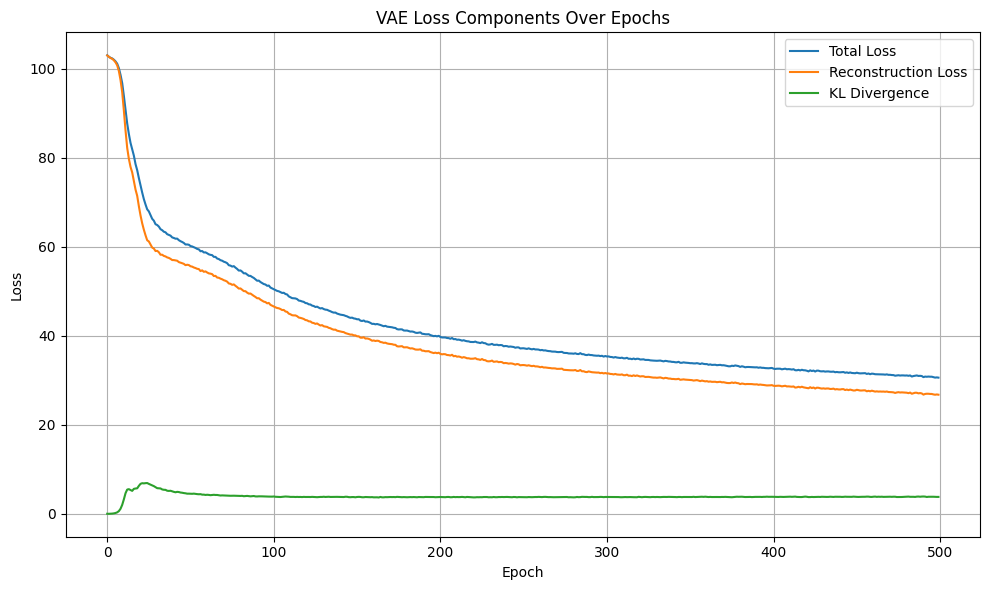

dim of latent mu: (331, 2)


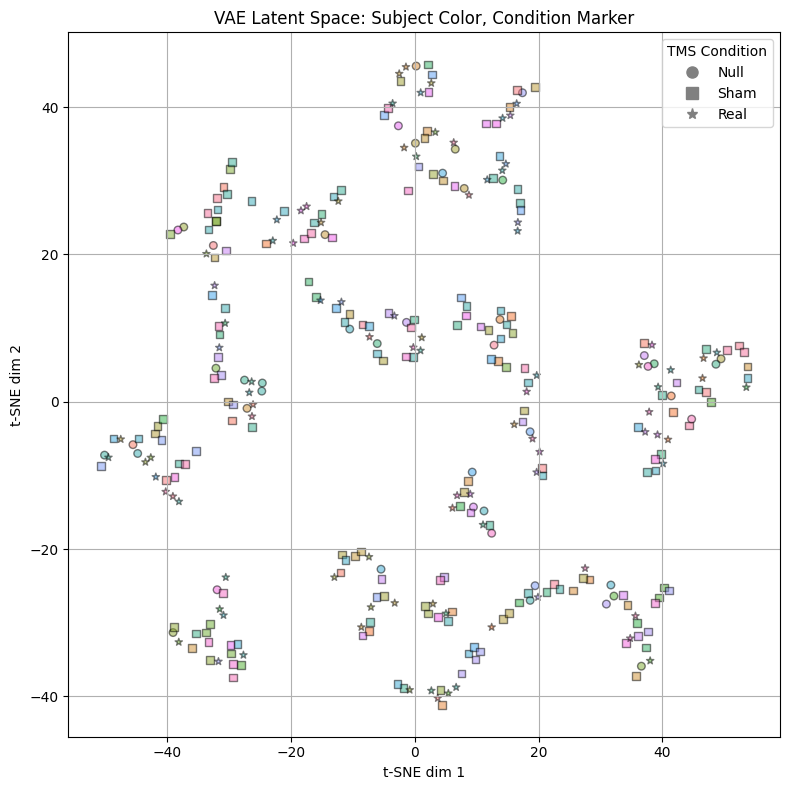

Paired t-test: t = -0.571, p = 0.5709


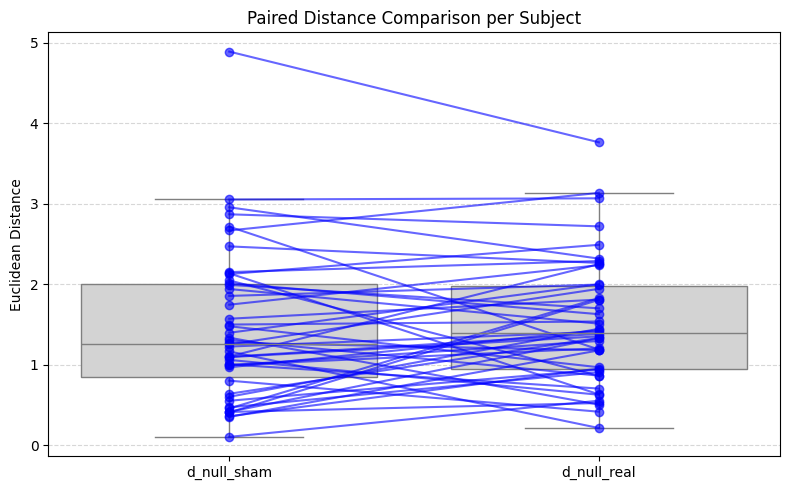

In [39]:
# Set up model, optimizer, and device
input_dim = X_tensor.shape[1]
cond_dim = subject_cond_tensor.shape[1]
latent_dim = 2 # need to do some sensitivity analysis here
hidden_dim = 64 
NUM_EPOCH = 500
LR = 3e-4
model = CVAE(input_dim=input_dim, cond_dim=cond_dim, latent_dim=latent_dim, hidden_dim=hidden_dim).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
total_loss_hist, recon_loss_hist, kld_loss_hist = train_vae(model, dataloader, optimizer, device=DEVICE, epochs=NUM_EPOCH)

plot_vae_losses(total_loss_hist, recon_loss_hist, kld_loss_hist)

mu_all = get_latent_mu_cvae(model, X_tensor, subject_cond_tensor, device=DEVICE)
# 2d-TSNE
z_2d = TSNE(n_components=2, perplexity=8).fit_transform(mu_all)
plot_latent_embedding_by_condition_and_subject(z_2d, all_tms_type, all_subject_id)

df = compute_condition_distances(mu_all, all_tms_type, all_subject_id, condition_map)

# Paired t-test
t_stat, p_val_t = ttest_rel(df["d_null_sham"], df["d_null_real"])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.4f}")
plot_subject_distance_comparison(df)

In [ ]:
output_dir = project_root / "outputs"
output_dir.mkdir(parents=True, exist_ok=True)   # ensure folder exists

# Build the filename
output_filename = output_dir / f"dist_summary_roi_{use_roi}.csv"

# Save DataFrame
df.to_csv(output_filename, index=False)

df_session_dists = compute_per_session_dist_to_null(mu_all, all_subject_id, all_tms_type, all_session)
output_filename = output_dir / f"session_distances_roi_{use_roi}.csv"

# Save DataFrame
df_session_dists.to_csv(output_filename, index=False)